In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sutharsan\Downloads\iNeubytes customerSegment T3\data.csv',encoding = 'latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.isnull().any()  # 2 missing values

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
# 1.here all UK based
#df1 = df[df['Country'] == 'United Kingdom']
df1 = df
df1.shape

(541909, 8)

In [11]:
# 3.dtype-->Date want in Datetime type
df1['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
df1.duplicated().sum()

5268

In [15]:
df1.drop_duplicates(inplace=True)
df1.shape

(536641, 8)

In [16]:
df1.dropna(inplace=True)
df1.shape

(401604, 8)

In [17]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df1.to_csv(r'C:\Users\sutharsan\Downloads\cleaned_customer_segment.csv')

### My Tableau

In [19]:
# https://public.tableau.com/app/profile/aarthy8395/viz/Customer_Segmentation_16895163561520/Dashboard1?publish=yes

In [20]:
# new features
df1['cost'] = df1['UnitPrice'] * df1['Quantity']

In [21]:
df1.insert(loc = 7,column = 'month',value=df1.InvoiceDate.dt.month)
df1.insert(loc = 6,column = 'year',value=df1.InvoiceDate.dt.year)
df1.insert(loc = 5,column = 'days',value=df1.InvoiceDate.dt.dayofweek)

In [22]:
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,2.55,2010,17850.0,12,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2,3.39,2010,17850.0,12,United Kingdom,20.34


In [23]:
df1['CustomerID'] = df1['CustomerID'].astype('int64')  # from float to int

In [24]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,2.55,2010,17850,12,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,2.75,2010,17850,12,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34


In [25]:
df1.CustomerID.nunique()   # 3921 customers

4372

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Country_le'] = le.fit_transform(df['Country']) 

In [27]:
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost,Country_le
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,2.55,2010,17850,12,United Kingdom,15.30,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34,35


In [28]:
Top5_Quantity = df1.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False)

In [29]:
Top5_Quantity.head(5)    

StockCode
84077     53119
22197     48689
85099B    44963
84879     35215
85123A    34185
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='StockCode'>

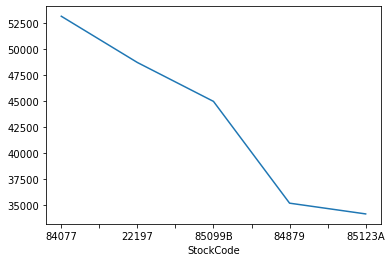

In [30]:
Top5_Quantity[:5].plot()

In [31]:
annual_cost = df1.groupby('CustomerID')['cost'].sum().sort_values(ascending = False)

In [32]:
annual_cost.head()  # top 5 customer in cost 

CustomerID
14646    279489.02
18102    256438.49
17450    187322.17
14911    132458.73
12415    123725.45
Name: cost, dtype: float64

<AxesSubplot:xlabel='CustomerID'>

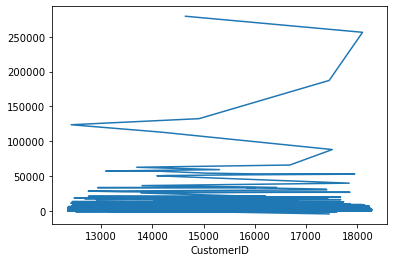

In [33]:
annual_cost.plot()

In [34]:
df1 = df1.merge(annual_cost, on='CustomerID')

In [35]:
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost_x,Country_le,cost_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,2.55,2010,17850,12,United Kingdom,15.30,35,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34,35,5303.48


In [36]:
new_name = { 'cost_y':'annual_cost'}
df1.rename(columns=new_name,inplace=True)

In [37]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,days,UnitPrice,year,CustomerID,month,Country,cost_x,Country_le,annual_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,2.55,2010,17850,12,United Kingdom,15.30,35,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34,35,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,2.75,2010,17850,12,United Kingdom,22.00,35,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34,35,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2,3.39,2010,17850,12,United Kingdom,20.34,35,5303.48


In [39]:
top5_cost_sales =  df1.groupby('cost_x')['Description'].count().sort_values(ascending = False)

In [40]:
top5_cost_sales.head()

cost_x
15.0    20026
17.7     9156
16.5     8470
10.2     8009
19.8     7608
Name: Description, dtype: int64

<AxesSubplot:xlabel='month'>

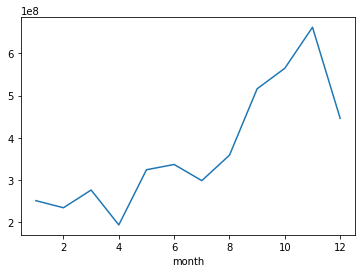

In [42]:
df1.groupby('month')['annual_cost'].sum().plot()  # november and december is high

In [43]:
df1.year.unique()

array([2010, 2011], dtype=int64)

<AxesSubplot:xlabel='year'>

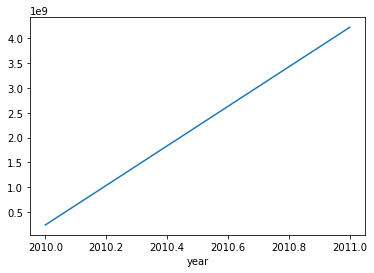

In [44]:
df1.groupby('year')['annual_cost'].sum().plot()

In [45]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'days', 'UnitPrice', 'year', 'CustomerID', 'month', 'Country', 'cost_x',
       'Country_le', 'annual_cost'],
      dtype='object')

In [46]:
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
days                    int64
UnitPrice             float64
year                    int64
CustomerID              int64
month                   int64
Country                object
cost_x                float64
Country_le              int32
annual_cost           float64
dtype: object

In [47]:
x=df1[['Quantity','UnitPrice', 'year', 'month','days','Country_le']]
y = df1['annual_cost']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
train_score = lr.score(x_train,y_train)
lr_pred = lr.predict(x_test)
print('Linear Regression Training score',train_score)

Linear Regression Training score 0.11417995861377384


In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mse = mean_squared_error
mae = mean_absolute_error

In [52]:
lr_mae = mae(y_test,lr_pred)
lr_mse = mse(y_test,lr_pred)
lr_rmse = np.sqrt(lr_mse)

In [53]:
lr_mae,lr_mse,lr_rmse

(13223.794685131252, 795780633.2182795, 28209.5840667366)

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
RF_score = RF.score(x_train,y_train)
RF_pred = RF.predict(x_test)
print('RF Regressor',RF_score)   

RF Regressor 0.9108966121155408


In [55]:
RF_mae = mae(y_test,RF_pred)
RF_mse = mse(y_test,RF_pred)
RF_rmse = np.sqrt(RF_mse)

In [56]:
print('Random Forest Regressor')
RF_mae,RF_mse,RF_rmse

Random Forest Regressor


(5902.6471624140495, 158589934.3741715, 12593.249555780727)

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_score = dt.score(x_train,y_train)
dt_pred = dt.predict(x_test)
print('DT Regressor',dt_score)   # it may overfit


DT Regressor 0.9196820667117723


In [58]:
dt_mae = mae(y_test,dt_pred)
dt_mse = mse(y_test,dt_pred)
dt_rmse = np.sqrt(dt_mse)

In [59]:
print('decision tree Regressor')
dt_mae,dt_mse,dt_rmse

decision tree Regressor


(5967.904493987258, 199671153.27997527, 14130.504353347593)

In [60]:
from tabulate import tabulate

tab = pd.DataFrame({'MAE' :[lr_mae,RF_mae,dt_mae],
                   'MSE': [lr_mse,RF_mse,dt_mse],
                   'RMSE' : [lr_rmse,RF_rmse,dt_rmse],
                   'train_score' : [train_score,RF_score,dt_score]},
                   index= ['LR','RF','DT']
                  )

print(tabulate(tab,headers = 'keys',tablefmt='psql'))

+----+----------+-------------+---------+---------------+
|    |      MAE |         MSE |    RMSE |   train_score |
|----+----------+-------------+---------+---------------|
| LR | 13223.8  | 7.95781e+08 | 28209.6 |      0.11418  |
| RF |  5902.65 | 1.5859e+08  | 12593.2 |      0.910897 |
| DT |  5967.9  | 1.99671e+08 | 14130.5 |      0.919682 |
+----+----------+-------------+---------+---------------+


In [62]:
# RMSE is very less in DecisionTree
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'days', 'UnitPrice', 'year', 'CustomerID', 'month', 'Country', 'cost_x',
       'Country_le', 'annual_cost'],
      dtype='object')

In [63]:
# RFM
recent_date = df1['InvoiceDate'].max()

In [66]:
rfm = df1.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(recent_date - x.max()).days,
    'InvoiceNo' : 'nunique',
    'cost_x' : 'sum'
})

In [67]:
rfm.rename(columns = {'InvoiceDate' : 'Recency','InvoiceNo': 'Frequencey','cost_x':'Monetary'},inplace = True)

In [70]:
rfm.sample(3)

,Recency,Frequencey,Monetary
CustomerID,,,
17333,85,1,494.25
12740,63,1,427.60
16318,34,1,328.15


### K-mean cluster

In [71]:
rfm_scale = ss.fit_transform(rfm)

In [72]:
from sklearn.cluster import KMeans

In [77]:
# choosing k value with elbow method
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(rfm_scale)
    sse.append(km.inertia_)

In [78]:
sse

[13116.0,
 9133.293602232692,
 5525.906227430065,
 4048.14890604168,
 3020.2033502512554,
 2371.196877298542,
 1906.7371760913936,
 1586.1651612933958,
 1351.5438719425663]

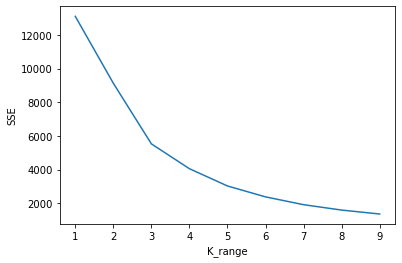

In [79]:
plt.xlabel('K_range')
plt.ylabel('SSE')
plt.plot(k_rng,sse)  # k = 2 

In [90]:
km = KMeans(n_clusters=3)
rfm['cluster'] = km.fit_predict(rfm_scale)


In [91]:
rfm.sample(3)

,Recency,Frequencey,Monetary,cluster
CustomerID,,,,
17817,3,3,387.68,1
17490,0,11,1926.88,1
17043,31,4,1735.18,1


In [92]:
rfm['cluster'].value_counts()

1    3241
2    1108
0      23
Name: cluster, dtype: int64

In [93]:
km.cluster_centers_

array([[-8.53169481e-01,  8.75956679e+00,  9.72987139e+00],
       [-5.15671029e-01,  5.56969577e-02, -9.47655011e-03],
       [ 1.53163775e+00, -3.45837979e-01, -1.74701460e-01]])

In [95]:
rfm_1 = rfm[rfm.cluster==0]
rfm_2 = rfm[rfm.cluster==1]
rfm_3 = rfm[rfm.cluster==2]

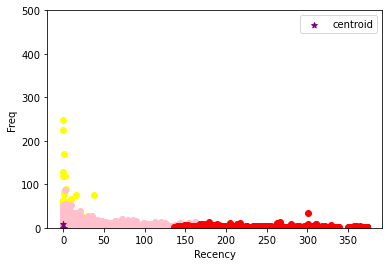

In [97]:
plt.scatter(rfm_1['Recency'],rfm_1['Frequencey'],color='yellow')
plt.scatter(rfm_2['Recency'],rfm_2['Frequencey'],color='pink')
plt.scatter(rfm_3['Recency'],rfm_3['Frequencey'],color = 'red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Recency')
plt.ylabel('Freq')
plt.ylim(0,500)
plt.legend()

(0.0, 2000.0)

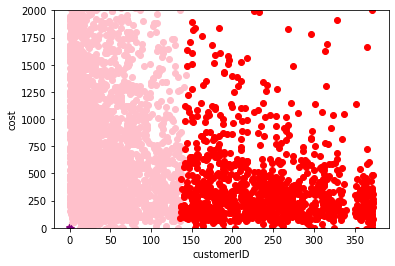

In [99]:
# without limit.
plt.scatter(rfm_1['Recency'],rfm_1['Monetary'],color='yellow')
plt.scatter(rfm_2['Recency'],rfm_2['Monetary'],color='pink')
plt.scatter(rfm_3['Recency'],rfm_3['Monetary'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('customerID')                 
plt.ylabel('cost')
plt.ylim(0,2000)

In [100]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'days', 'UnitPrice', 'year', 'CustomerID', 'month', 'Country', 'cost_x',
       'Country_le', 'annual_cost'],
      dtype='object')

In [102]:
transcation = df1.groupby('days').agg({'cost_x' : 'sum','InvoiceNo':'count'}) \
             .rename(columns ={'cost_x':'total amount','InvoiceNo' :'No-of-orders'})


In [103]:
transcation

,total amount,No-of-orders
days,,
0,1271078.601,65715
1,1562715.681,67376
2,1526440.000,69753
3,1902316.050,81575
4,1238556.741,55512
6,777412.351,61673


<AxesSubplot:xlabel='days', ylabel='total amount'>

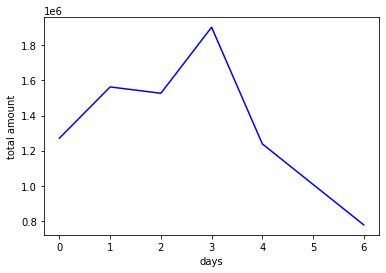

In [104]:
sns.lineplot(x= 'days',y='total amount',data = transcation,color='blue')


<AxesSubplot:xlabel='days', ylabel='No-of-orders'>

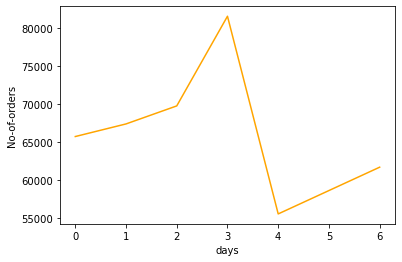

In [105]:
sns.lineplot(x= 'days',y='No-of-orders',data = transcation,color='orange')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


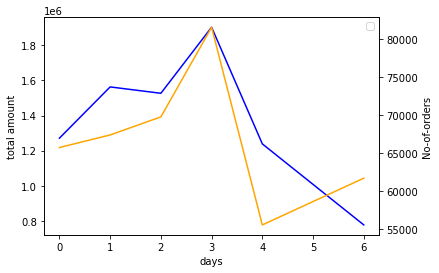

In [106]:
ax1 = sns.lineplot(x= 'days',y='total amount',data = transcation,color='blue')
ax2 = ax1.twinx()
sns.lineplot(x= 'days',y='No-of-orders',data = transcation,color='orange',ax=ax2)
plt.legend()

In [108]:
transcation_month = df1.groupby('month').agg({'cost_x' : 'sum','InvoiceNo':'count'}) \
             .rename(columns ={'cost_x':'total amount','InvoiceNo' :'No-of-orders'})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


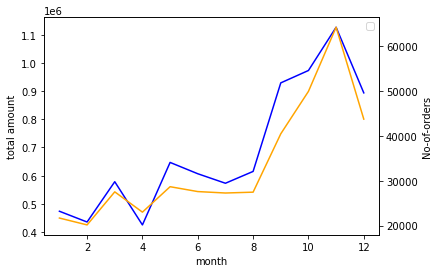

In [109]:
ax1 = sns.lineplot(x= 'month',y='total amount',data = transcation_month,color='blue')
ax2 = ax1.twinx()
sns.lineplot(x= 'month',y='No-of-orders',data = transcation_month,color='orange',ax=ax2)
plt.legend()

In [110]:
transcation_year = df1.groupby('year').agg({'cost_x' : 'sum','InvoiceNo':'count'}) \
             .rename(columns ={'cost_x':'total amount','InvoiceNo' :'No-of-orders'})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


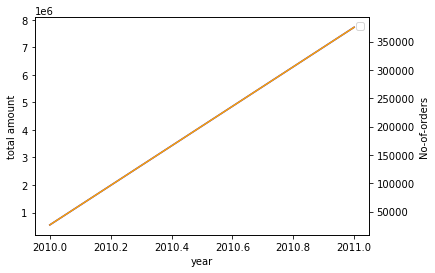

In [111]:
ax1 = sns.lineplot(x= 'year',y='total amount',data = transcation_year,color='blue')
ax2 = ax1.twinx()
sns.lineplot(x= 'year',y='No-of-orders',data = transcation_year,color='orange',ax=ax2)
plt.legend()